CITY:
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [1]:
import pandas as pd

# Cargar únicamente la columna 'city' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['city'], delimiter=',', encoding='latin-1')
# Verificar si la columna 'city' existe en el DataFrame
if 'city' in data.columns:
    # Tipo de dato
    tipo_dato = data['city'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['city'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['city'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['city'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['city'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'city':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'city' no existe en el DataFrame.")

Columna 'city':
 - Tipo de dato: object
 - Cantidad de nulos: 0
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 10
 - Cantidad de datos totales: 279712


Obtener Frecuencia Absoluta, Frecuencia Relativa y la Moda


In [2]:
if 'city' in data.columns: 
    # Moda
    moda = data['city'].mode()[0]
    
    # Cantidad por variable
    cantidad_por_variable = data['city'].value_counts()
    
    # Porcentaje por variable
    porcentaje_por_variable = (cantidad_por_variable / cantidad_totales) * 100
    
    # Imprimir resultados formateados
    print(f"Columna 'city':")
    print(f" - Moda: {moda}\n")
    print(" - Cantidad por variable:")
    for valor, cantidad in cantidad_por_variable.items():
        print(f"   {valor}: {cantidad}")
    print("\n - Porcentaje por variable:")
    for valor, porcentaje in porcentaje_por_variable.items():
        print(f"   {valor}: {porcentaje:.2f}%")
else:
    print("La columna 'city' no existe en el DataFrame.")

Columna 'city':
 - Moda: Paris

 - Cantidad por variable:
   Paris: 64690
   New York: 37012
   Sydney: 33630
   Rome: 27647
   Rio de Janeiro: 26615
   Istanbul: 24519
   Mexico City: 20065
   Bangkok: 19361
   Cape Town: 19086
   Hong Kong: 7087

 - Porcentaje por variable:
   Paris: 23.13%
   New York: 13.23%
   Sydney: 12.02%
   Rome: 9.88%
   Rio de Janeiro: 9.52%
   Istanbul: 8.77%
   Mexico City: 7.17%
   Bangkok: 6.92%
   Cape Town: 6.82%
   Hong Kong: 2.53%


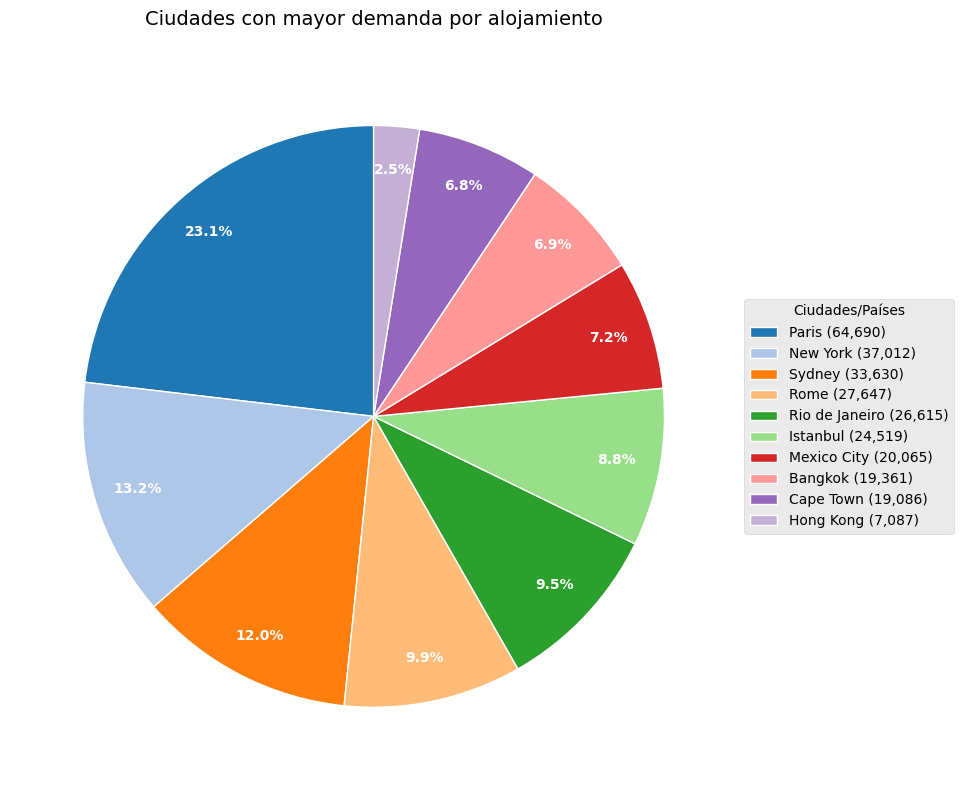

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuración de estilo
plt.style.use('ggplot')
plt.rcParams['font.size'] = 10


# Función para crear gráfico mejorado
def crear_grafico_torta(series, titulo):
    # Preparar datos
    total = series.sum()
    porcentajes = series/total*100
    
    # Configurar colores
    colors = plt.cm.tab20.colors[:len(series)]
    
    # Crear figura
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Crear gráfico de torta
    wedges, texts, autotexts = ax.pie(series, 
                                      colors=colors,
                                      startangle=90,
                                      autopct='%1.1f%%',
                                      pctdistance=0.85,
                                      wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    
    # Ajustar posición de los porcentajes
    plt.setp(autotexts, size=10, weight='bold', color='white')
    
    # Crear leyenda a la derecha
    legend_labels = [f'{label} ({count:,})' for label, count in zip(series.index, series)]
    ax.legend(wedges, legend_labels,
              title="Ciudades/Países",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))
    
    # Título
    plt.title(titulo, fontsize=14, pad=20)
    
    # Mostrar
    plt.tight_layout()
    plt.show()

# Gráfico para ciudades (top 10)
if 'city' in data.columns:
    top_cities = data['city'].value_counts().head(10)
    crear_grafico_torta(top_cities, 'Ciudades con mayor demanda por alojamiento')

# Gráfico para países (si existe)
if 'country' in data.columns:
    country_dist = data['country'].value_counts()
    crear_grafico_torta(country_dist, 'Distribución por País')